# Baseline study using tf-idf

Following the baselines suggested in [Adhikari et al.](https://arxiv.org/pdf/1904.08398v3.pdf)

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, accuracy_score, precision_score, recall_score
%matplotlib inline

In [14]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')

In [17]:
def baseline_test(model, train, test, ngram_range=(1,1), cmap='Blues'):
    tfidf = TfidfVectorizer(stop_words='english',
                                ngram_range=ngram_range)
    X_train = tfidf.fit_transform(train.cleaned_contents)
    y_train = train.Discrimination_Label
    X_test = tfidf.transform(test.cleaned_contents)
    y_test = test.Discrimination_Label

    # Instantiate the learner
    model.fit(X=X_train, y=y_train)
    y_hat = model.predict(X_test)

    # Report results
    print(model)
    print('Accuracy:  ', round(accuracy_score(y_test, y_hat),3))
    print('Precision: ', round(precision_score(y_test, y_hat),3))
    print('Recall:    ', round(recall_score(y_test, y_hat),3))
    
    

    plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
    plt.show()

    plot_roc_curve(model, X_test, y_test)
    plt.show()

## Logistic regression with unigrams

LogisticRegression()
Accuracy:   0.679
Precision:  0.68
Recall:     0.876


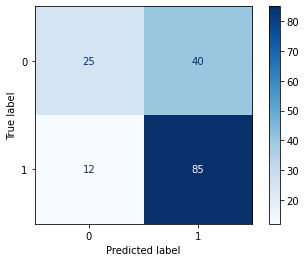

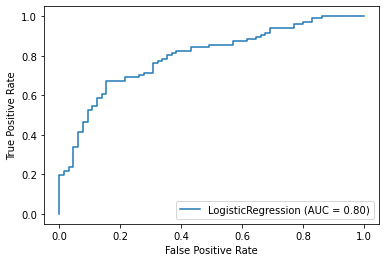

In [18]:
baseline_test(LogisticRegression(), train, test)

## Logistic regression with bigrams

LogisticRegression()
Accuracy:   0.704
Precision:  0.679
Recall:     0.959


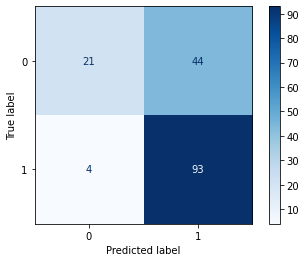

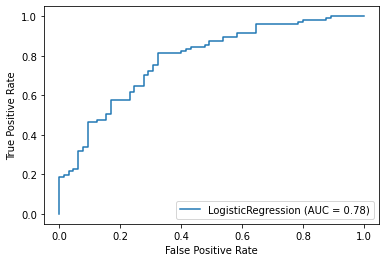

In [21]:
baseline_test(LogisticRegression(), train, test, ngram_range=(2,2))

## Logistic regression with trigrams

LogisticRegression()
Accuracy:   0.673
Precision:  0.655
Recall:     0.959


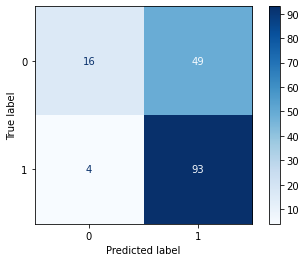

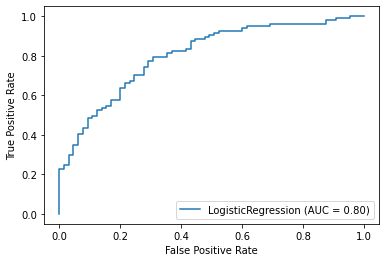

In [22]:
baseline_test(LogisticRegression(), train, test, ngram_range=(3,3))

## SVM with unigrams

SVC()
Accuracy:   0.673
Precision:  0.672
Recall:     0.887


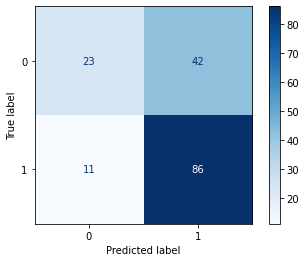

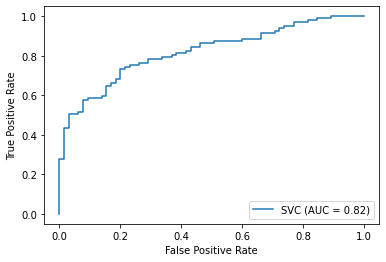

In [25]:
baseline_test(SVC(), train, test, ngram_range=(1,1))

## SVM with bigrams

SVC()
Accuracy:   0.691
Precision:  0.669
Recall:     0.959


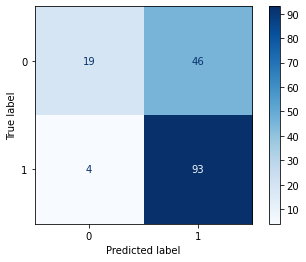

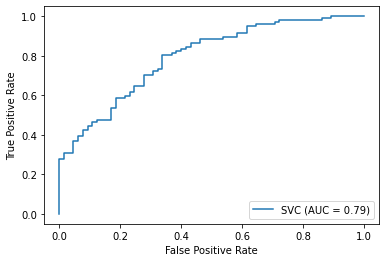

In [26]:
baseline_test(SVC(), train, test, ngram_range=(2,2))

## SVC with trigrams

SVC()
Accuracy:   0.654
Precision:  0.638
Recall:     0.979


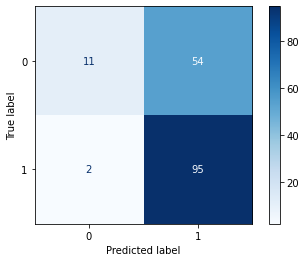

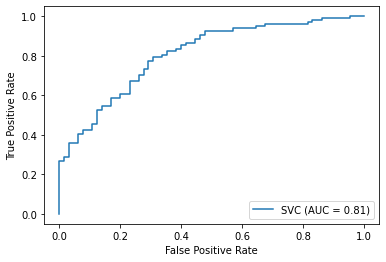

In [27]:
baseline_test(SVC(), train, test, ngram_range=(3,3))

LogisticRegression()
Accuracy:   0.679
Precision:  0.68
Recall:     0.876


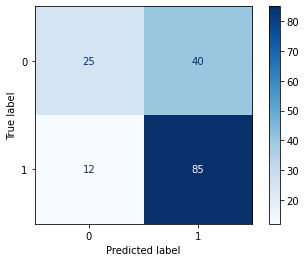

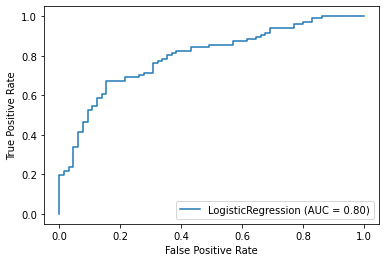

In [36]:
model = LogisticRegression()
ngram_range = (1,1)

tfidf = TfidfVectorizer(stop_words='english',
                                ngram_range=ngram_range)
X_train = tfidf.fit_transform(train.cleaned_contents)
y_train = train.Discrimination_Label
X_test = tfidf.transform(test.cleaned_contents)
y_test = test.Discrimination_Label

# Instantiate the learner
model.fit(X=X_train, y=y_train)
y_hat = model.predict(X_test)

# Report results
print(model)
print('Accuracy:  ', round(accuracy_score(y_test, y_hat),3))
print('Precision: ', round(precision_score(y_test, y_hat),3))
print('Recall:    ', round(recall_score(y_test, y_hat),3))



plot_confusion_matrix(model, X_test, y_test, cmap='Blues')
plt.show()

plot_roc_curve(model, X_test, y_test)
plt.show()